    neo_id                name  absolute_magnitude  estimated_diameter_min  \
0  2162117  162117 (1998 SD15)               19.14                0.394962   
1  2349507    349507 (2008 QY)               18.50                0.530341   
2  2455415    455415 (2003 GA)               21.45                0.136319   
3  3132126           (2002 PB)               20.63                0.198863   
4  3557844           (2011 DW)               22.70                0.076658   

   estimated_diameter_max orbiting_body  relative_velocity  miss_distance  \
0                0.883161         Earth       71745.401048   5.814362e+07   
1                1.185878         Earth      109949.757148   5.580105e+07   
2                0.304818         Earth       24865.506798   6.720689e+07   
3                0.444672         Earth       78890.076805   3.039644e+07   
4                0.171412         Earth       56036.519484   6.311863e+07   

   is_hazardous  
0         False  
1          True  
2         Fals

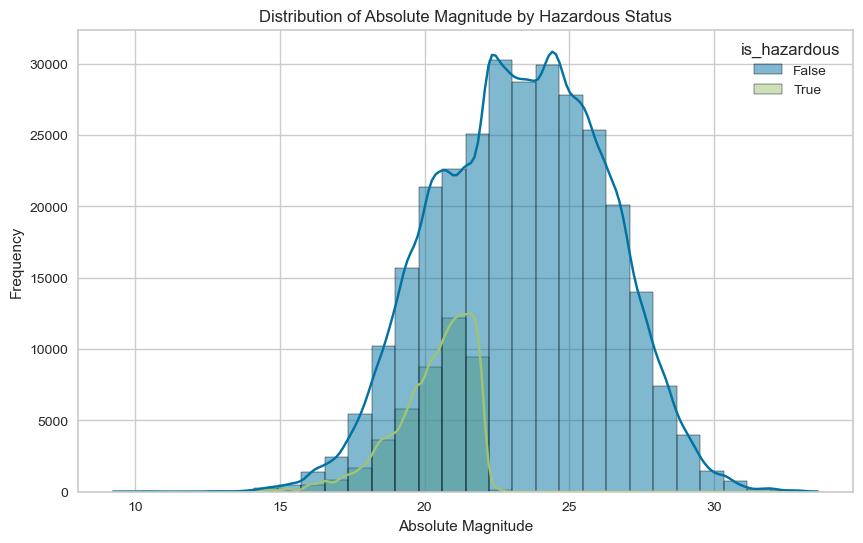

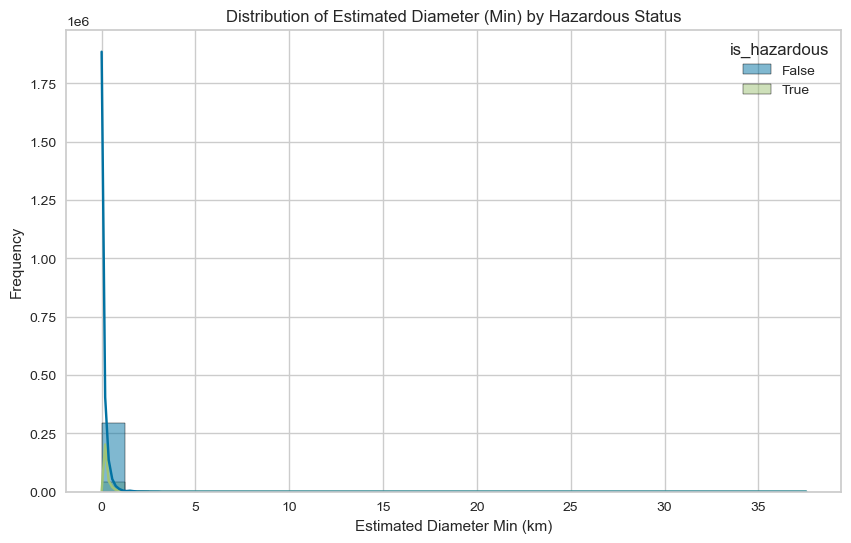

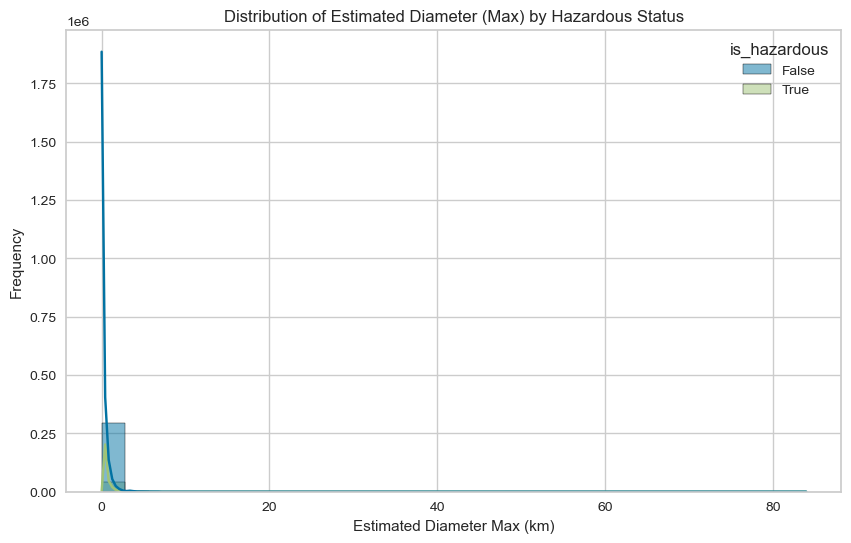

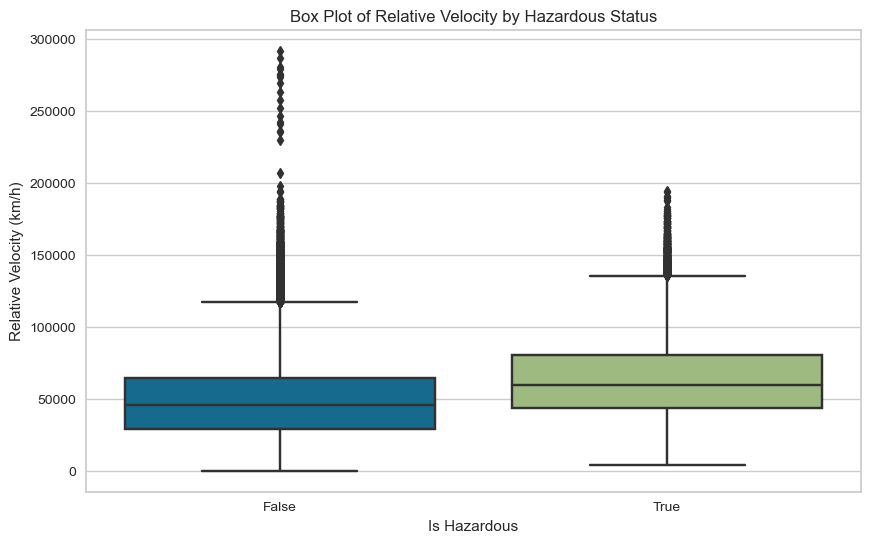

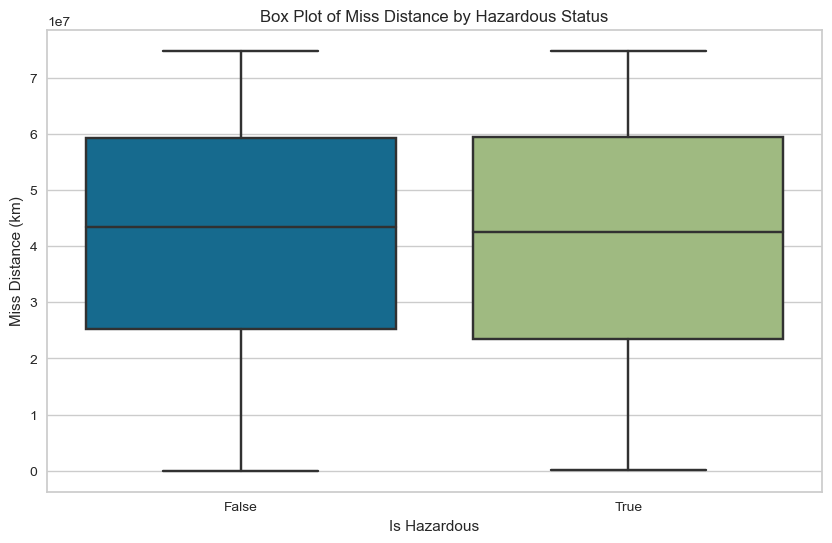

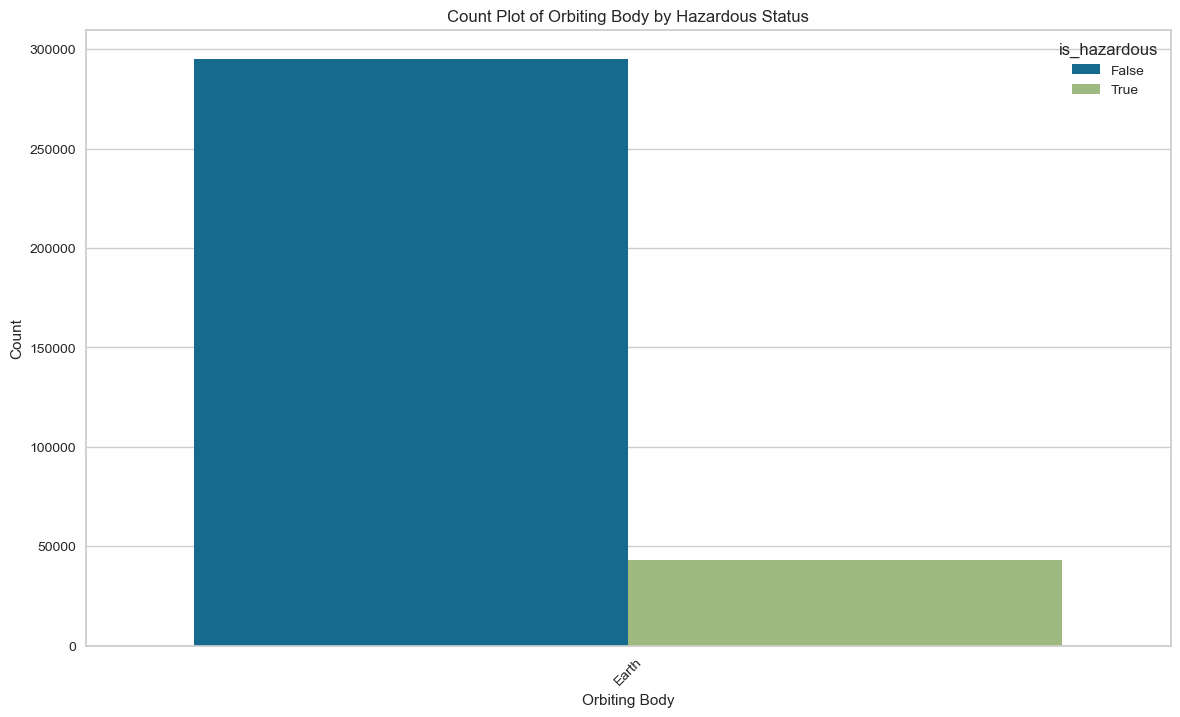

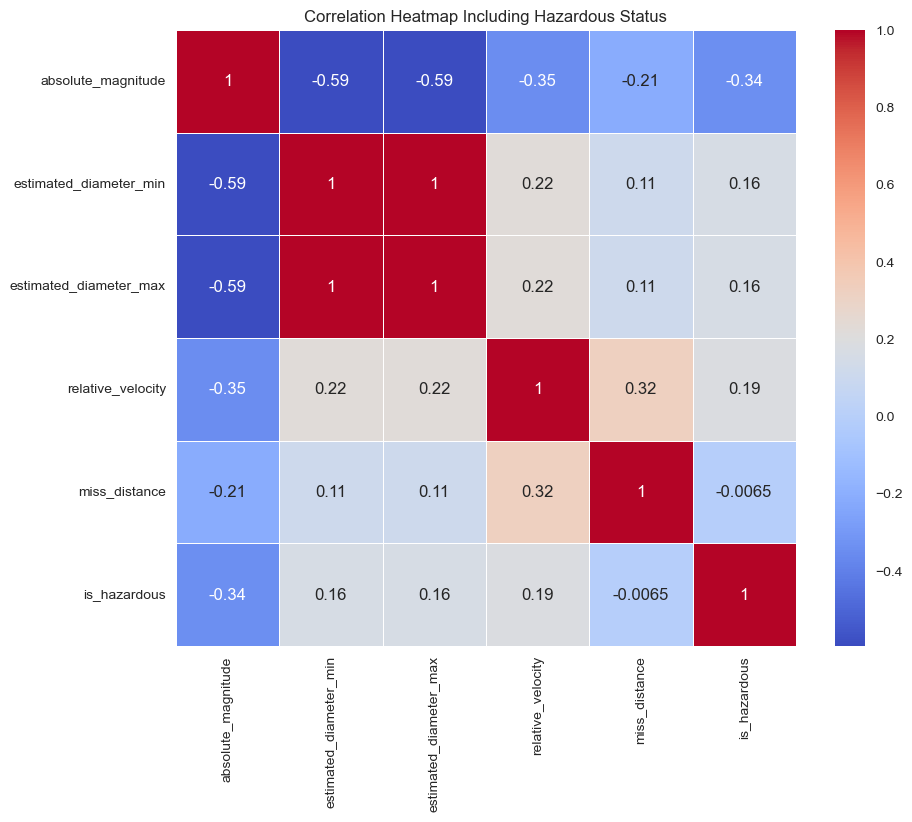

,Description,Value
0,Session id,42
1,Target,is_hazardous
2,Target type,Binary
3,Original data shape,"(338171, 5)"
4,Transformed data shape,"(338171, 5)"
5,Transformed train set shape,"(236719, 5)"
6,Transformed test set shape,"(101452, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9144,0.9447,0.5455,0.7165,0.6193,0.5721,0.5789,5.6380
rf,Random Forest Classifier,0.9122,0.9431,0.5377,0.7042,0.6098,0.5613,0.5678,16.2800
lightgbm,Light Gradient Boosting Machine,0.8882,0.9046,0.2057,0.7167,0.3196,0.2786,0.3442,0.8390
gbc,Gradient Boosting Classifier,0.8855,0.8960,0.1598,0.7381,0.2627,0.2276,0.3083,15.2220
dt,Decision Tree Classifier,0.8844,0.7438,0.5549,0.5465,0.5507,0.4843,0.4844,0.4940
ada,Ada Boost Classifier,0.8839,0.8868,0.1557,0.7035,0.2549,0.2188,0.2942,3.7720
knn,K Neighbors Classifier,0.8786,0.8481,0.3809,0.5340,0.4446,0.3786,0.3854,0.7240
svm,SVM - Linear Kernel,0.8724,0.7965,0.0000,0.0000,0.0000,0.0000,0.0000,0.1910
dummy,Dummy Classifier,0.8724,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1100
ridge,Ridge Classifier,0.8723,0.8344,0.0000,0.0500,0.0001,-0.0001,-0.0014,0.1150


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Transformation Pipeline and Model Successfully Saved


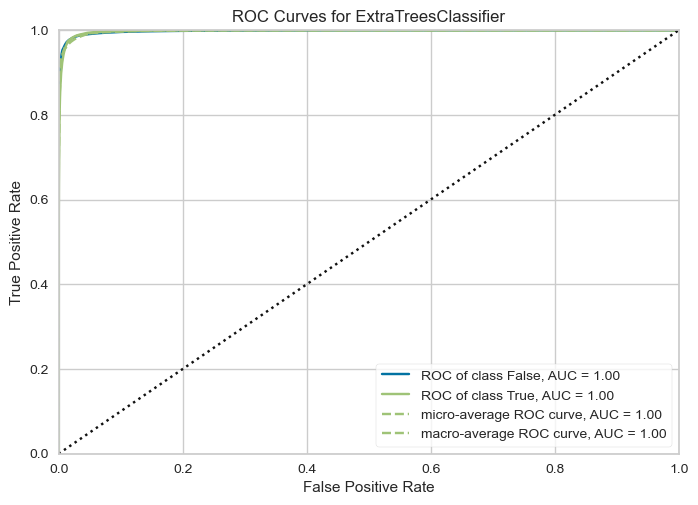

Best Scikit-learn Model: Random Forest
ROC-AUC Score: 0.95

Model: Logistic Regression
ROC-AUC Score: 0.84
Classification Report:
              precision    recall  f1-score       support
False          0.880630  0.988339  0.931381  59088.000000
True           0.478030  0.073827  0.127901   8547.000000
accuracy       0.872773  0.872773  0.872773      0.872773
macro avg      0.679330  0.531083  0.529641  67635.000000
weighted avg   0.829754  0.872773  0.829846  67635.000000
Confusion Matrix:
[[58399   689]
 [ 7916   631]]

Model: Decision Tree
ROC-AUC Score: 0.75
Classification Report:
              precision    recall  f1-score      support
False          0.938216  0.935977  0.937095  59088.00000
True           0.564572  0.573886  0.569191   8547.00000
accuracy       0.890220  0.890220  0.890220      0.89022
macro avg      0.751394  0.754931  0.753143  67635.00000
weighted avg   0.890999  0.890220  0.890603  67635.00000
Confusion Matrix:
[[55305  3783]
 [ 3642  4905]]

Model: Random Fo

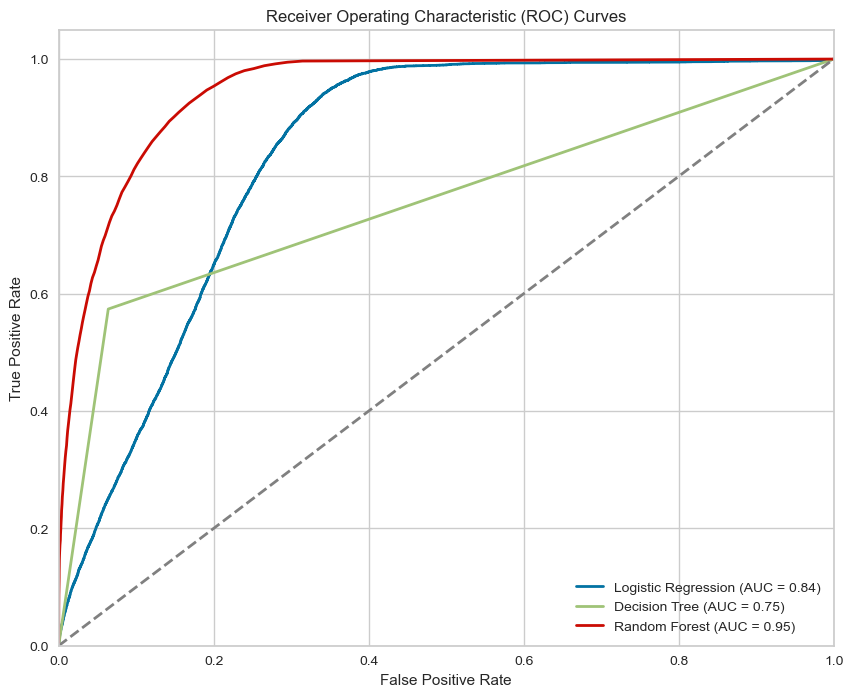


Best PyCaret Model: ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=42, verbose=0,
                     warm_start=False)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from pycaret.classification import *
# Load the dataset
url = 'C:/Users/hp/OneDrive/Desktop/kdd/nearest-earth-objects(1910-2024).csv'
data = pd.read_csv(url)

# Display the first few rows of the dataset
print(data.head())

# Display basic information about the dataset
print(data.info())

# Display basic statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Print column names to verify them
print(data.columns)


# 1. Distribution of Absolute Magnitude by Hazardous Status

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='absolute_magnitude', hue='is_hazardous', bins=30, kde=True)
plt.title('Distribution of Absolute Magnitude by Hazardous Status')
plt.xlabel('Absolute Magnitude')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of Estimated Diameter (Min) by Hazardous Status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='estimated_diameter_min', hue='is_hazardous', bins=30, kde=True)
plt.title('Distribution of Estimated Diameter (Min) by Hazardous Status')
plt.xlabel('Estimated Diameter Min (km)')
plt.ylabel('Frequency')
plt.show()


# 3. Distribution of Estimated Diameter (Max) by Hazardous Status
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='estimated_diameter_max', hue='is_hazardous', bins=30, kde=True)
plt.title('Distribution of Estimated Diameter (Max) by Hazardous Status')
plt.xlabel('Estimated Diameter Max (km)')
plt.ylabel('Frequency')
plt.show()


# 4. Box Plot of Relative Velocity by Hazardous Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_hazardous', y='relative_velocity', data=data)
plt.title('Box Plot of Relative Velocity by Hazardous Status')
plt.xlabel('Is Hazardous')
plt.ylabel('Relative Velocity (km/h)')
plt.show()

# 5. Box Plot of Miss Distance by Hazardous Status
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_hazardous', y='miss_distance', data=data)
plt.title('Box Plot of Miss Distance by Hazardous Status')
plt.xlabel('Is Hazardous')
plt.ylabel('Miss Distance (km)')
plt.show()


# 6. Count Plot of Orbiting Body by Hazardous Status
plt.figure(figsize=(14, 8))
sns.countplot(x='orbiting_body', hue='is_hazardous', data=data)
plt.title('Count Plot of Orbiting Body by Hazardous Status')
plt.xlabel('Orbiting Body')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# 7. Correlation Heatmap Including is_hazardous

plt.figure(figsize=(10, 8))
corr_matrix = data[['absolute_magnitude', 'estimated_diameter_min', 'estimated_diameter_max', 'relative_velocity', 'miss_distance', 'is_hazardous']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap Including Hazardous Status')
plt.show()

# Load the dataset
df = pd.read_csv('C:/Users/hp/OneDrive/Desktop/kdd/nearest-earth-objects(1910-2024).csv')

# Handle missing values
df = df.dropna()

# Feature Engineering: Calculate average diameter
df['estimated_diameter_avg'] = (df['estimated_diameter_min'] + df['estimated_diameter_max']) / 2

# Select features and target variable
features = ['absolute_magnitude', 'estimated_diameter_avg', 'relative_velocity', 'miss_distance']
X = df[features]
y = df['is_hazardous']

# Combine features and target into a single DataFrame
data = X.copy()
data['is_hazardous'] = y

# Initialize the PyCaret environment
clf = setup(data, target='is_hazardous', session_id=42,
            normalize=True,  # Normalize features
            remove_multicollinearity=True,  # Remove multicollinearity
            ignore_features=None)  # Do not ignore any features

# Compare models using PyCaret
best_model_pycaret = compare_models()

# Evaluate the best PyCaret model
evaluate_model(best_model_pycaret)

# Finalize and save the PyCaret model
final_model_pycaret = finalize_model(best_model_pycaret)
save_model(final_model_pycaret, 'best_neo_model_pycaret')

# Plot ROC curve for the best PyCaret model
plot_model(final_model_pycaret, plot='auc')

# --- Traditional scikit-learn Models ---
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Function to evaluate models
def evaluate_model_sklearn(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    report = classification_report(y_test, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    confusion = confusion_matrix(y_test, y_pred)
    return report, roc_auc, confusion

# Evaluate all scikit-learn models
results = {}
for model_name, model in models.items():
    report, roc_auc, confusion = evaluate_model_sklearn(model, X_train_scaled, X_test_scaled, y_train, y_test)
    results[model_name] = {'report': report, 'roc_auc': roc_auc, 'confusion': confusion}

# Print the results for scikit-learn models
best_model_name = max(results, key=lambda x: results[x]['roc_auc'])
print(f"Best Scikit-learn Model: {best_model_name}")
print(f"ROC-AUC Score: {results[best_model_name]['roc_auc']:.2f}")

# Display all model results
for model_name, metrics in results.items():
    print(f"\nModel: {model_name}")
    print(f"ROC-AUC Score: {metrics['roc_auc']:.2f}")
    print("Classification Report:")
    print(pd.DataFrame(metrics['report']).transpose())
    print("Confusion Matrix:")
    print(metrics['confusion'])

# Plot ROC curves for all scikit-learn models
plt.figure(figsize=(10, 8))
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

print(f"\nBest PyCaret Model: {best_model_pycaret}")